# Simulations and Metadata

The first things we need to know about the data are
 1. which simulations are available, and
 2. what physical systems those simulations represent.

The answers are provided by the `Simulations` object, which contains `Metadata` for each simulation.

## Simulations

To begin, we load the `Simulations` object with the `sxs.load` function:

In [1]:
import sxs

simulations = sxs.load("simulations")

The first time you call this function, it will attempt to download [the latest data from github](https://github.com/sxs-collaboration/sxs/tree/simulations) and cache it locally, as described in [the previous notebook](../00-Introduction#configuration-and-caching-preliminaries).

The returned object is essentially a `dict`, where the keys are SXS IDs like "SXS:BBH:1234":

In [2]:
list(simulations)[:10]

['SXS:BBH:0001',
 'SXS:BBH:0002',
 'SXS:BBH:0003',
 'SXS:BBH:0004',
 'SXS:BBH:0005',
 'SXS:BBH:0006',
 'SXS:BBH:0007',
 'SXS:BBH:0008',
 'SXS:BBH:0009',
 'SXS:BBH:0010']

The values in this `dict` are essentially also `dict`s with metadata about the simulation.

## Metadata

For each simulation, you need to know its physical parameters — mass ratio, spins, initial separation, eccentricity, etc. — as well as information about the simulation itself and where to find the data.  The `sxs.Metadata` object encapsulates that information, with nice interactive features to help you explore.

Just to take an example, let's focus on one particular simulation in the list, the binary black hole simulation with SXS ID `SXS:BBH:0123`:

In [3]:
metadata = simulations["SXS:BBH:0123"]

Essentially, `metadata` is a standard python `dict`, with a few extra bells and whistles.  For example, it looks a bit tidier than your basic `dict`:

In [4]:
metadata

Metadata([('simulation_name',
           'd15-q1.1-sA_0.266_-0.0234_-0.416_sB_0.027_-0.0595_0.126/Lev5'),
          ('alternative_names', 'SXS:BBH:0123'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 16.4621796348),
          ('reference_mass_ratio', 1.1004796188799273),
          ('reference_chi_eff', -0.15755434271832663),
          ('reference_chi1_perp', 0.26619415828746285),
          ('reference_chi2_perp', 0.06460212496073088),
          ('reference_eccentricity', '<7.2e-05'),
          ('reference_dimensionless_spin1',
           [0.266756234962, 0.0203147886466, -0.415103367667]),
          ('reference_dimensionless_spin2',
           [0.037600485, -0.053650766128, 0.12634712782]),
          ('reference_orbital_frequency',
           [-3.9872660232e-05, -0.00016988370621, 0.0159748747344]),
          ('reference_mass1', 0.524041316426),
          ('reference_mass2', 0.476193568182),
          ('reference_time',

Some of these fields are more interesting than others.  Presumably, the most interesting ones are the numbers — things like the mass ratio and spins.  You can access them individually just like any `dict`:

In [5]:
metadata["reference_mass_ratio"]

1.1004796188799273

Note that we also have tab completion when using IPython (or Jupyter).  For example, if you just start with

```python
metadata["reference_m
```

and then hit tab, you'll see a list of possible completions.  Every key can also be accessed as an attribute:

In [6]:
metadata.reference_mass_ratio

1.1004796188799273

This also gives you tab completion.

Finally, we also provide some backwards compatibility with the older NRAR metadata format, which called for hyphens to be used where we use underscores:

In [7]:
metadata["reference-mass-ratio"]

1.1004796188799273

## Pain points with the metadata

One of the issues that has built up over time is the fact that metadata keys are not entirely consistent.  For example, one key:value pair we see above is this:

In [8]:
metadata["reference_eccentricity"]

'<7.2e-05'

We might have expected to get a number out of this, but we got a string.  This is because the eccentricity fitting function can't always find a very exact value, and only returns an upper bound.  So if you're sorting through lots of different metadata files, looking for eccentricities — let's say — above 0.1, you might have a line that says

```python
if metadata["reference_eccentricity"] > 0.1:
    do_something()
```

Unfortunately, once you get to this particular metadata file, that test ***WILL RAISE AN ERROR***:

In [9]:
metadata["reference_eccentricity"] > 0.1

TypeError: '>' not supported between instances of 'str' and 'float'

There are also many datasets where values are missing.  For example, many of these keys make no sense for simulations with matter (BHNS and NSNS); similarly many critical pieces of information in matter simulations are irrelevant for BBH simulations.

We need a more systematic interface to the data.

## Pain reliever: the dataframe

The idea behind these metadata objects is that they should serve as the official records of what was written at the time the simulation was run.  We don't want to be too clever above fixing the pain points, because we might incorrectly change some critical piece of information.

*However*, if you are willing to trade the possibility that this will replace data that you could make sense of with NaNs, for the sake of consistency, then the `simulations` object provides a more uniform interface to all the metadata collected in one place, in the form of `simulations.dataframe`.

The widely used `pandas` package is designed for precisely this application: analysing tabular data with heterogeneously typed columns.  It provides very powerful features for all sorts of sorting, selection, and statistical analysis.  So we use `pandas` to help us:

In [10]:
df = simulations.dataframe

This creates a dataframe (or table) with consistent types, and NaN for missing values:

In [11]:
df

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BBH:0001,BHBH,BBH_CFMS,18.00000,0.012203,-0.000025,0.993736,"[7.5160071e-09, 2.4389069e-09, -5.798632e-10]",7.923059e-09,"[4.27581822e-08, -2.342625073e-07, 1.184715566...",1.184716,...,NaN,NaN,2012-07-31 13:17:11-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,28.119083,SXS:BBH:2325,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v1.6, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr..."
SXS:BBH:0002,BHBH,BBH_CFMS,19.00000,0.011292,-0.000021,0.994031,"[1.6810827e-09, 1.4244131e-09, -1.14839759e-08]",1.169345e-08,"[2.7620419806e-06, -2.4287931932e-06, 1.210130...",1.210131,...,NaN,NaN,2012-07-31 13:17:11-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,32.421068,SXS:BBH:2326,"[, v1.1, v1.2, v1.4, v1.5, v1.6, v1.7, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr..."
SXS:BBH:0003,BHBH,BBH_CFMS,19.00000,0.011284,-0.000019,0.994277,"[2.599703e-09, -4.1239227e-09, 6.03918869017e-05]",6.039189e-05,"[0.1251774015530911, -0.0006755685628109, 1.21...",1.216661,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,32.337574,SXS:BBH:2327,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Precessing-Spins, ManyMergers-QuasiCircular, ..."
SXS:BBH:0004,BHBH,BBH_CFMS,19.00000,0.011313,-0.000028,0.994314,"[-2.7524803e-09, 5.883293e-09, 5.3376578e-09]",8.407132e-09,"[8.163645183e-07, 7.736321355e-07, 1.094457487...",1.094457,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,30.188749,SXS:BBH:2328,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep..."
SXS:BBH:0005,BHBH,BBH_CFMS,18.00000,0.012168,-0.000016,0.993947,"[-3.7413651e-09, -2.4006761e-09, 7.874335e-10]",4.514544e-09,"[9.790607752e-07, 1.026494432e-07, 1.300909689...",1.300910,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,30.190238,SXS:BBH:2329,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:BHNS:0008,BHNS,BHNS,62.00490,0.004222,0.000037,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:BHNS:0009,BHNS,BHNS,76.09780,0.003477,0.000028,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:BHNS:0010,BHNS,BHNS,71.01310,0.003524,0.000000,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:NSNS:0001,NSNS,NSNS,39.99990,0.006049,-0.000014,2.778400,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,12.600000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope, NSNS]"


Plus, we can use the `qgridnext` package to make this cool interactive table (which, unfortunately, will not show up if you are viewing this as a static web page):

In [12]:
from qgridnext import show_grid
show_grid(df, precision=8, show_toolbar=True, grid_options={"forceFitColumns": False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

You can sort by a column by clicking on the column header.  You can also filter by value by clicking the <span class="fa fa-filter filter-icon"></span> icon in the header.

## Doing that and more, programatically

While graphical interfaces are fun, there is more reproducibility and power in programming.

### Slices

We can slice the dataframe in a dizzying number of ways.  But there are two that are simplest and most reliable.  First, and most easily, we can take standard slices, like the first four elements:

In [13]:
df[:4]

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BBH:0001,BHBH,BBH_CFMS,18.0,0.012203,-0.000025,0.993736,"[7.5160071e-09, 2.4389069e-09, -5.798632e-10]",7.923059e-09,"[4.27581822e-08, -2.342625073e-07, 1.184715566...",1.184716,...,NaN,NaN,2012-07-31 13:17:11-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,28.119083,SXS:BBH:2325,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v1.6, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr..."
SXS:BBH:0002,BHBH,BBH_CFMS,19.0,0.011292,-0.000021,0.994031,"[1.6810827e-09, 1.4244131e-09, -1.14839759e-08]",1.169345e-08,"[2.7620419806e-06, -2.4287931932e-06, 1.210130...",1.210131,...,NaN,NaN,2012-07-31 13:17:11-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,32.421068,SXS:BBH:2326,"[, v1.1, v1.2, v1.4, v1.5, v1.6, v1.7, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr..."
SXS:BBH:0003,BHBH,BBH_CFMS,19.0,0.011284,-0.000019,0.994277,"[2.599703e-09, -4.1239227e-09, 6.03918869017e-05]",6.039189e-05,"[0.1251774015530911, -0.0006755685628109, 1.21...",1.216661,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,32.337574,SXS:BBH:2327,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Precessing-Spins, ManyMergers-QuasiCircular, ..."
SXS:BBH:0004,BHBH,BBH_CFMS,19.0,0.011313,-0.000028,0.994314,"[-2.7524803e-09, 5.883293e-09, 5.3376578e-09]",8.407132e-09,"[8.163645183e-07, 7.736321355e-07, 1.094457487...",1.094457,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,30.188749,SXS:BBH:2328,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep..."


Or we can select columns to extract:

In [14]:
df[["object_types", "initial_adot"]]

,object_types,initial_adot
SXS:BBH:0001,BHBH,-0.000025
SXS:BBH:0002,BHBH,-0.000021
SXS:BBH:0003,BHBH,-0.000019
SXS:BBH:0004,BHBH,-0.000028
SXS:BBH:0005,BHBH,-0.000016
...,...,...
SXS:BHNS:0008,BHNS,0.000037
SXS:BHNS:0009,BHNS,0.000028
SXS:BHNS:0010,BHNS,0.000000
SXS:NSNS:0001,NSNS,-0.000014


To combine them, we just do them in sequence:

In [15]:
df[:4][["object_types", "initial_adot"]]

,object_types,initial_adot
SXS:BBH:0001,BHBH,-0.000025
SXS:BBH:0002,BHBH,-0.000021
SXS:BBH:0003,BHBH,-0.000019
SXS:BBH:0004,BHBH,-0.000028


### Tests

The concept of tests is fairly simply.  For example, we can test whether or not the `object_types` field is equal to `BHNS`:

In [16]:
df["object_types"] == "BHNS"

SXS:BBH:0001     False
SXS:BBH:0002     False
SXS:BBH:0003     False
SXS:BBH:0004     False
SXS:BBH:0005     False
                 ...  
SXS:BHNS:0008     True
SXS:BHNS:0009     True
SXS:BHNS:0010     True
SXS:NSNS:0001    False
SXS:NSNS:0002    False
Name: object_types, Length: 2778, dtype: bool

We get a pandas Series object, where most of the results say `False`, but the last few say `True` — because they are the ones for which the `object_types` field is `BHNS`.  Now, we can use this Series just like we would in numpy to extract the items where this test gives us `True`:

In [17]:
df[df["object_types"] == "BHNS"]

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BHNS:0001,BHNS,BHNS,106.6800,0.002537,0.000001,9.754357,"[-2.03885932771e-05, 9.797238987913e-05, -5.05...",0.000100,"[1.71682e-10, -4.67012e-09, 46.6686927]",46.668693,...,0.000000,0.0,2013-03-06 13:52:11-08:00,2019-04-14 19:48:30-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,12.647523,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]"
SXS:BHNS:0002,BHNS,BHNS,56.0000,0.004456,-0.000015,4.169582,"[-1.9413609314e-06, -8.496132757e-07, 1.095574...",0.000002,"[0.0, 0.0, 16.60638426824671]",16.606384,...,0.049606,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,13.300000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]"
SXS:BHNS:0003,BHNS,BHNS,51.4300,0.005595,0.000000,5.400000,"[0.0, 0.0, 0.0]",0.000000,"[0.0, 0.0, 16.60638426824671]",16.606384,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,13.300000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]"
SXS:BHNS:0004,BHNS,BHNS,39.2000,0.006233,-0.000022,2.778112,"[-1.2457454507e-06, 5.44427247228e-06, -6.2716...",0.000006,"[0.0, 0.0, 8.447059816549256]",8.447060,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,12.300000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope]"
SXS:BHNS:0005,BHNS,BHNS,39.2000,0.006235,-0.000025,2.780039,"[2.981054730059816e-06, -1.22406716840395e-06,...",0.000003,"[0.0, 0.0, 8.111755992167552]",8.111756,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,10.800000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[SpinningNS, Polytrope]"
SXS:BHNS:0006,BHNS,BHNS,52.5000,0.004524,-0.000012,3.475229,"[-3.413420373258928e-06, -2.0768413414982537e-...",0.000004,"[0.0, 0.0, 12.993342233650518]",12.993342,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,16.600000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope]"
SXS:BHNS:0007,BHNS,BHNS,56.0000,0.004454,-0.000015,4.171456,"[4.867002495810236e-07, -1.5158476150901928e-0...",0.000015,"[0.0, 0.0, 16.29283505660932]",16.292835,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,12.300000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[SpinningNS, Polytrope]"
SXS:BHNS:0008,BHNS,BHNS,62.0049,0.004222,0.000037,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:BHNS:0009,BHNS,BHNS,76.0978,0.003477,0.000028,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:BHNS:0010,BHNS,BHNS,71.0131,0.003524,0.000000,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]


(Here, we're just looking at the data, so we don't bother with the fancy grid we used above.)

Next, we might want to combine tests.  This is done by putting each test inside parentheses, and combinging results with `&`:

In [18]:
df[(df["object_types"] == "BHNS") & (df["initial_separation"] < 52)]

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BHNS:0003,BHNS,BHNS,51.43,0.005595,0.000000,5.400000,"[0.0, 0.0, 0.0]",0.000000,"[0.0, 0.0, 16.60638426824671]",16.606384,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,13.3,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]"
SXS:BHNS:0004,BHNS,BHNS,39.20,0.006233,-0.000022,2.778112,"[-1.2457454507e-06, 5.44427247228e-06, -6.2716...",0.000006,"[0.0, 0.0, 8.447059816549256]",8.447060,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,12.3,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope]"
SXS:BHNS:0005,BHNS,BHNS,39.20,0.006235,-0.000025,2.780039,"[2.981054730059816e-06, -1.22406716840395e-06,...",0.000003,"[0.0, 0.0, 8.111755992167552]",8.111756,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,10.8,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[SpinningNS, Polytrope]"


Here, the combined test is only `True` if both tests to return `True` — the `&` operator is the boolean AND.  We also have OR with `|` and XOR with `^`, as well as negation with `~` — though this can usually be achieved by changing the test.

Before we do anything else, it's convenient to use what we've just learned to separate out the different types of systems:

In [19]:
BHBH = df[df["object_types"] == "BHBH"]
BHNS = df[df["object_types"] == "BHNS"]
NSNS = df[df["object_types"] == "NSNS"]

### Sorting

As with the fancy graphical table above, we can perform a standard sort with respect to any key:

In [20]:
BHBH.sort_values("initial_separation")

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BBH:1145,BHBH,BBH_SKS,8.768433,0.033400,0.000528,0.988193,"[4.0159705e-09, -2.8874734e-09, 2.20182446e-08]",2.256698e-08,"[-5.79788e-11, -4.11334e-11, 0.8979940168937853]",0.897994,...,NaN,NaN,2015-09-23 08:06:10-07:00,2019-04-23 08:53:25-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,3.495636,NaN,"[, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:3722,BHBH,BBH_SKS,9.407000,0.030000,-0.000198,0.993240,"[7.9609465e-09, 5.0432421e-09, 3.9775058e-09]",1.022895e-08,"[0.5037166261156991, -0.2145529574370644, 0.84...",1.009884,...,NaN,NaN,2022-01-15 13:49:17-08:00,2022-08-08 18:18:46-05:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,9.975052,NaN,"[, v2.0]",[]
SXS:BBH:3704,BHBH,BBH_SKS,9.430725,0.030108,-0.000031,0.989613,"[1.658214632e-07, 9.05567461e-08, 1.195347e-10]",1.889373e-07,"[0.0039265586291782, -6.43212220851e-05, 1.040...",1.040374,...,NaN,NaN,2020-06-17 22:27:31-07:00,2020-08-09 12:14:41-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,6.396565,NaN,"[, v2.0]",[]
SXS:BBH:3726,BHBH,BBH_SKS,9.462000,0.030000,-0.000289,0.990572,"[-3.86638787e-08, -3.8823479e-08, -7.78173e-11]",5.479201e-08,"[-0.315268326520386, 0.0440983611469425, 1.076...",1.122706,...,NaN,NaN,2021-07-21 12:36:21-07:00,2022-05-23 15:20:27-05:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,8.439591,NaN,"[, v2.0]",[]
SXS:BBH:3720,BHBH,BBH_SKS,9.488000,0.030000,-0.000294,0.989701,"[1.06827404e-08, 1.30354321e-08, 5.719484e-10]",1.686329e-08,"[-0.1321012340474509, 0.1426761200702829, 1.06...",1.081416,...,NaN,NaN,2022-01-15 13:49:17-08:00,2022-04-01 12:39:03-05:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,6.843151,NaN,"[, v2.0]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:BBH:3888,BHBH,BBH_SHK,50.000000,0.001265,-0.003795,1.000461,"[-2.335461483e-07, 7.29418664e-08, -1.067907e-10]",2.446719e-07,"[-5.725183e-10, -1.29348339e-08, 0.81525856904...",0.815259,...,NaN,NaN,2019-11-05 10:57:50+01:00,2023-11-27 15:07:14+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0.582871,NaN,"[, v2.0]",AlmostHeadOn
SXS:BBH:3889,BHBH,BBH_SHK,50.000000,0.001386,-0.003752,1.000470,"[-6.41120096e-08, 3.31272244e-08, 7.8116942e-09]",7.258640e-08,"[-2.2777349e-09, 5.7852127e-09, 0.929894586374...",0.929895,...,NaN,NaN,2019-11-05 10:57:50+01:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,1.114827,NaN,"[, v2.0]",AlmostHeadOn
SXS:BBH:3890,BHBH,BBH_SHK,50.000000,0.001386,-0.003752,1.000460,"[-2.719040168e-07, 1.136213141e-07, -3.4949572...",2.947097e-07,"[2.8414687e-09, 3.1733529e-09, 0.8930582982295...",0.893058,...,NaN,NaN,2019-11-05 10:57:50+01:00,2023-11-27 14:50:29+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,1.079663,NaN,"[, v2.0]",AlmostHeadOn
SXS:BBH:3877,BHBH,BBH_SHK,50.000000,0.000400,-0.003980,1.000475,"[5.34201757e-08, -9.3712501e-09, 6.126849e-10]",5.423938e-08,"[2.8705307e-09, 3.7408382e-09, 0.2684587805050...",0.268459,...,NaN,NaN,2019-11-05 10:57:50+01:00,2023-10-25 16:01:41+01:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0.085822,NaN,"[, v2.0]",AlmostHeadOn


But unlike the fancy graphical table above, we can use a function that serves as the sort key.  (This sort of key function is also available in the standard python library's `sorted` function.)  Here, we'll sort by the absolute value of the difference between `initial_separation` and 20.0.

In [21]:
sorting_field = "initial_separation"
desired_value = 20.0

BHBH.sort_values(sorting_field, key=lambda s: abs(s-desired_value))

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BBH:0623,BHBH,BBH_SKS,20.000000,0.009837,0.000055,0.994419,"[-1.2597544e-09, 2.584556e-10, -3.42284249539e...",3.422842e-05,"[0.4507311241093057, -0.0400147208043062, 1.23...",1.311154,...,NaN,NaN,2015-01-08 16:07:43-08:00,2019-04-20 18:22:40-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,37.470458,NaN,"[, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:0204,BHBH,BBH_CFMS,20.000000,0.010446,-0.000005,0.997651,"[-4.10550747e-08, 2.06116119e-08, 9.9919665e-09]",4.701273e-08,"[5.532205836e-06, 4.47633244527e-05, 0.8415017...",0.841502,...,NaN,NaN,2013-08-23 15:48:09-07:00,2019-04-14 19:48:30-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,88.369299,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:1131,BHBH,BBH_SKS,20.000000,0.010403,0.000003,0.994285,"[1.47849e-11, -1.80773e-11, 0.0005509351422452]",5.509351e-04,"[0.1509150594264362, -0.0062555203815311, 1.23...",1.242480,...,NaN,NaN,2014-06-30 10:56:22-07:00,2019-04-20 18:22:40-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,36.796011,NaN,"[, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:1130,BHBH,BBH_SKS,20.000000,0.010526,0.000001,0.994279,"[-1.240433e-10, 1.000485e-10, -0.0002327491542...",2.327492e-04,"[8.52611666819e-05, 0.1452893471026843, 1.2337...",1.242241,...,NaN,NaN,2014-07-16 11:32:05-07:00,2019-04-20 18:22:40-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,36.775214,NaN,"[, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:3661,BHBH,BBH_SKS,19.998596,0.010381,0.000038,0.994403,"[2.0983064e-09, -7.882067e-10, -2.033826e-10]",2.250672e-09,"[1.334879298e-07, 7.18252001e-07, 1.3819318838...",1.381932,...,NaN,NaN,2015-04-06 15:49:13-05:00,2019-04-18 10:17:19-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,41.006968,NaN,"[, v2.0]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:BBH:3881,BHBH,BBH_SHK,50.000000,0.000800,-0.003919,1.000474,"[-2.055506492e-07, 7.31150132e-08, 2.24903385e...",2.193233e-07,"[8.34432e-10, -1.909687e-09, 0.5369062416144986]",0.536906,...,NaN,NaN,2019-11-05 10:57:50+01:00,2023-12-04 18:11:08+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0.196742,NaN,"[, v2.0]",AlmostHeadOn
SXS:BBH:3884,BHBH,BBH_SHK,50.000000,0.000980,-0.003878,1.000460,"[-9.49987917e-08, 4.73336834e-08, 1.51689308e-08]",1.072163e-07,"[-2.902236e-10, 4.674973e-10, 0.6315131220120281]",0.631513,...,NaN,NaN,2019-11-05 10:57:50+01:00,2023-12-04 18:11:08+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0.281018,NaN,"[, v2.0]",AlmostHeadOn
SXS:BBH:3885,BHBH,BBH_SHK,50.000000,0.001131,-0.003837,1.000472,"[4.62758229e-08, -2.53533789e-08, -6.0392405e-09]",5.311043e-08,"[-5.1873908e-09, -1.23564136e-08, 0.7592781342...",0.759278,...,NaN,NaN,2019-11-05 10:57:50+01:00,2023-12-04 18:11:08+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0.387796,NaN,"[, v2.0]",AlmostHeadOn
SXS:BBH:3888,BHBH,BBH_SHK,50.000000,0.001265,-0.003795,1.000461,"[-2.335461483e-07, 7.29418664e-08, -1.067907e-10]",2.446719e-07,"[-5.725183e-10, -1.29348339e-08, 0.81525856904...",0.815259,...,NaN,NaN,2019-11-05 10:57:50+01:00,2023-11-27 15:07:14+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0.582871,NaN,"[, v2.0]",AlmostHeadOn


So, if we want the 8 systems with initial separations closest to 20, we can just take them:

In [22]:
sorting_field = "initial_separation"
desired_value = 20.0
N = 8

BHBH.sort_values(sorting_field, key=lambda s: abs(s-desired_value))[:N]

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BBH:0623,BHBH,BBH_SKS,20.000000,0.009837,0.000055,0.994419,"[-1.2597544e-09, 2.584556e-10, -3.42284249539e...",3.422842e-05,"[0.4507311241093057, -0.0400147208043062, 1.23...",1.311154,...,NaN,NaN,2015-01-08 16:07:43-08:00,2019-04-20 18:22:40-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,37.470458,NaN,"[, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:0204,BHBH,BBH_CFMS,20.000000,0.010446,-0.000005,0.997651,"[-4.10550747e-08, 2.06116119e-08, 9.9919665e-09]",4.701273e-08,"[5.532205836e-06, 4.47633244527e-05, 0.8415017...",0.841502,...,NaN,NaN,2013-08-23 15:48:09-07:00,2019-04-14 19:48:30-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,88.369299,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:1131,BHBH,BBH_SKS,20.000000,0.010403,0.000003,0.994285,"[1.47849e-11, -1.80773e-11, 0.0005509351422452]",5.509351e-04,"[0.1509150594264362, -0.0062555203815311, 1.23...",1.242480,...,NaN,NaN,2014-06-30 10:56:22-07:00,2019-04-20 18:22:40-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,36.796011,NaN,"[, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:1130,BHBH,BBH_SKS,20.000000,0.010526,0.000001,0.994279,"[-1.240433e-10, 1.000485e-10, -0.0002327491542...",2.327492e-04,"[8.52611666819e-05, 0.1452893471026843, 1.2337...",1.242241,...,NaN,NaN,2014-07-16 11:32:05-07:00,2019-04-20 18:22:40-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,36.775214,NaN,"[, v1.2, v1.3, v1.4, v1.5, v2.0]",[]
SXS:BBH:3661,BHBH,BBH_SKS,19.998596,0.010381,0.000038,0.994403,"[2.0983064e-09, -7.882067e-10, -2.033826e-10]",2.250672e-09,"[1.334879298e-07, 7.18252001e-07, 1.3819318838...",1.381932,...,NaN,NaN,2015-04-06 15:49:13-05:00,2019-04-18 10:17:19-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,41.006968,NaN,"[, v2.0]",[]
SXS:BBH:2299,BHBH,BBH_SHK,19.997802,0.010194,0.002171,0.994103,"[9.977159e-09, 1.1158121e-08, 2.210107e-10]",1.496984e-08,"[-9.49201e-11, -6.10328e-11, 1.190023790296173]",1.190024,...,NaN,NaN,2019-07-23 16:57:41-07:00,2019-08-23 11:56:35-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,28.242072,SXS:BBH:2603,"[, v2.0]",deprecated
SXS:BBH:2603,BHBH,BBH_SHK,19.997802,0.010194,0.002171,0.994103,"[1.25331308e-08, 1.67409341e-08, -3.89072e-11]",2.091267e-08,"[2.457399e-10, 2.748791e-10, 1.190023742793307]",1.190024,...,NaN,NaN,2021-04-14 20:34:04-07:00,2021-05-25 13:15:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,28.239081,NaN,"[, v2.0]",[]
SXS:BBH:3913,BHBH,BBH_SKS,20.014343,0.010177,0.000130,0.994365,"[-8.8487893e-08, 9.17480655e-08, 5.0764e-12]",1.274669e-07,"[-1.9339e-12, 3.7192e-12, 1.360752542245232]",1.360753,...,NaN,NaN,2018-08-11 21:43:59-05:00,2019-05-09 19:46:53-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,40.585760,NaN,"[, v2.0]",[]


### Plotting

Pandas also makes it easy to plot the various quantities.  For example, we can make a scatter plot of mass ratio versus $\chi_{\mathrm{eff}}$:

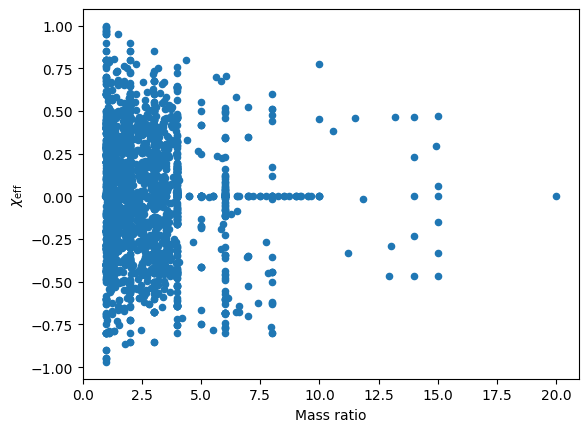

In [23]:
BHBH.plot("reference_mass_ratio", "reference_chi_eff", kind="scatter")

# pandas adds the column labels as axis labels, but we can make them look nicer
import matplotlib.pyplot as plt
plt.xlabel(r"Mass ratio")
plt.ylabel(r"$\chi_\mathrm{eff}$");

Or we can make histograms of the data:

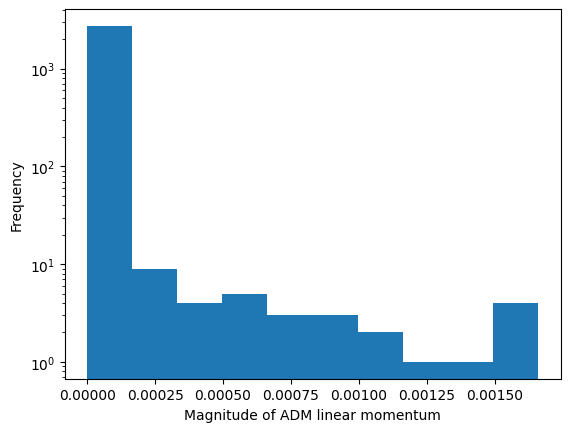

In [24]:
BHBH["initial_ADM_linear_momentum_mag"].plot.hist(log=True)
plt.xlabel(r"Magnitude of ADM linear momentum");

We can even make corner plots:

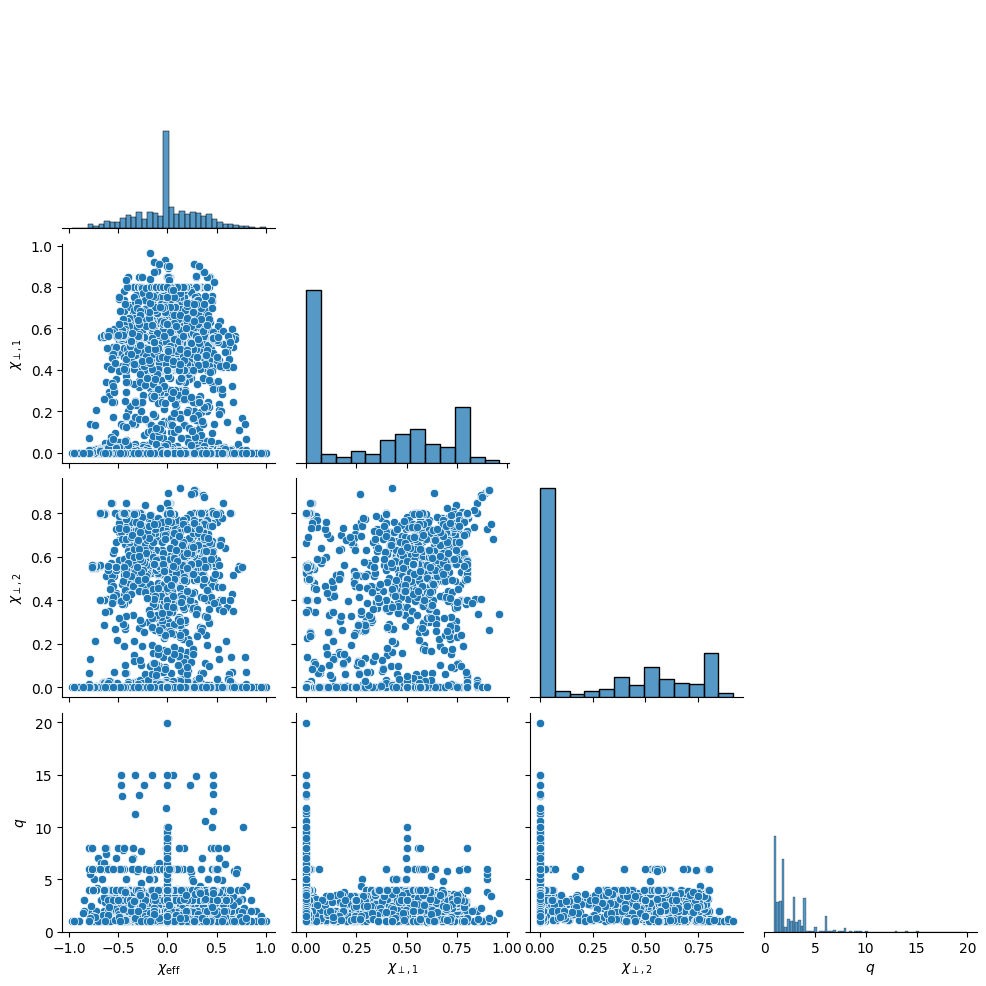

In [25]:
import seaborn as sns

pp = sns.pairplot(
    BHBH[["reference_chi_eff", "reference_chi1_perp", "reference_chi2_perp", "reference_mass_ratio"]].dropna(),
    corner=True,
)
pp.y_vars = [r"$\chi_{\mathrm{eff}}$", r"$\chi_{\perp,1}$", r"$\chi_{\perp,2}$", r"$q$"]
pp.x_vars = pp.y_vars
pp._add_axis_labels()

The `simulations` object, especially when agumented with the `dataframe`, provides powerful methods for selecting the particular simulations we are interested in.  Once we have done so, we need to load and interact with the simulations.

Continue with the [introduction to the `Simulation` objects](/tutorials/02-Simulation).

In [28]:
df

,object_types,initial_data_type,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,...,disk_mass,ejecta_mass,date_link_earliest,date_postprocessing,date_run_earliest,date_run_latest,number_of_orbits,superseded_by,DOI_versions,keywords
SXS:BBH:0001,BHBH,BBH_CFMS,18.00000,0.012203,-0.000025,0.993736,"[7.5160071e-09, 2.4389069e-09, -5.798632e-10]",7.923059e-09,"[4.27581822e-08, -2.342625073e-07, 1.184715566...",1.184716,...,NaN,NaN,2012-07-31 13:17:11-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,28.119083,SXS:BBH:2325,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v1.6, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr..."
SXS:BBH:0002,BHBH,BBH_CFMS,19.00000,0.011292,-0.000021,0.994031,"[1.6810827e-09, 1.4244131e-09, -1.14839759e-08]",1.169345e-08,"[2.7620419806e-06, -2.4287931932e-06, 1.210130...",1.210131,...,NaN,NaN,2012-07-31 13:17:11-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,32.421068,SXS:BBH:2326,"[, v1.1, v1.2, v1.4, v1.5, v1.6, v1.7, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr..."
SXS:BBH:0003,BHBH,BBH_CFMS,19.00000,0.011284,-0.000019,0.994277,"[2.599703e-09, -4.1239227e-09, 6.03918869017e-05]",6.039189e-05,"[0.1251774015530911, -0.0006755685628109, 1.21...",1.216661,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,32.337574,SXS:BBH:2327,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Precessing-Spins, ManyMergers-QuasiCircular, ..."
SXS:BBH:0004,BHBH,BBH_CFMS,19.00000,0.011313,-0.000028,0.994314,"[-2.7524803e-09, 5.883293e-09, 5.3376578e-09]",8.407132e-09,"[8.163645183e-07, 7.736321355e-07, 1.094457487...",1.094457,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,30.188749,SXS:BBH:2328,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep..."
SXS:BBH:0005,BHBH,BBH_CFMS,18.00000,0.012168,-0.000016,0.993947,"[-3.7413651e-09, -2.4006761e-09, 7.874335e-10]",4.514544e-09,"[9.790607752e-07, 1.026494432e-07, 1.300909689...",1.300910,...,NaN,NaN,2012-08-07 15:02:51-04:00,2019-03-30 06:41:50-07:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,30.190238,SXS:BBH:2329,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:BHNS:0008,BHNS,BHNS,62.00490,0.004222,0.000037,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:BHNS:0009,BHNS,BHNS,76.09780,0.003477,0.000028,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:BHNS:0010,BHNS,BHNS,71.01310,0.003524,0.000000,NaN,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,NaN,NaN,"[, v2.0]",[]
SXS:NSNS:0001,NSNS,NSNS,39.99990,0.006049,-0.000014,2.778400,"[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,...,NaN,NaN,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,0001-01-01 00:00:00+00:00,12.600000,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope, NSNS]"


In [34]:
(df["initial_data_type"] == "BBH_SKS")[1]

KeyError: 1